# <center>Churn Prediction<center>
                                                                                                          By - Neha Yadav
                                                                                                               Mridu Malhotra
                                                                                                               Mohit Kumar
                                                                                                        Date - 31 Jan 2019
____

## Index

-  **1. Introduction**
-  **2.  Data Description**
-  **3.  Environment Preperation**
-  **4.  Data Validation**
-  **5.  Exploratory Data Analysis**
-  **6.  Data Preprocessing**
-  **7.  Machine Learning Models**
-  **8.  Conclusion**
____

### 1. Introduction -
In the world of ruthless competition to increase the profit margins or even take a hit ob margins at the cost of higher market share, Retaining current customers is a major area of focus for telecom companies. 
I try to build a model which would help in understanding possible reasons for customer attrition and in the end try to predict customers most likely to churn. 
____

### 2. Data Description

Dataset - Telecom Churn Customers <br>
Source  - https://www.kaggle.com/blastchar/telco-customer-churn <br>
Description from Kaggle - 
    -  Each row represents a customer, each column contains customer’s attributes described on the column Metadata. 
    -  The raw data contains 7043 rows (customers) and 21 columns (features).
    -  The “Churn” column is our target. 
____

### 3. Environment Preperation - Loading Libraries and Dataset

In [1]:
# Data Analysis and wrangling
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# PCA libraries
from scipy.linalg import eigh
from sklearn import decomposition

# Preprocessing and Standardization
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Train Test Split
from sklearn import model_selection

# Performance Measure
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# Machine Learinig Libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import tree
from sklearn import ensemble
from sklearn import linear_model
from sklearn.ensemble import VotingClassifier

C:\Users\AB94613\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# Load Dataset 
rawdata = pd.read_csv('ChurnDataset.csv')

In [3]:
# Dataset SneakPeak - First 5 Rows and Columns
rawdata.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Dataset Shape 
rawdata.shape

(7043, 21)

In [5]:
# Broad Level Info about various columns
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

#### Observation -
* 20 Input Features and 1 Output Feature (churn). In total 21 features (columns) and 7043 customers (rows).
* Among 17 Categorical Features, Senior Citizen is of integer Datatype. 
* Among 3 numerical features, TotalCharges is of Object Datatype. 

#### Unique Values and their counts

In [6]:
# Data types and unique values and their count in each column
columns = rawdata.columns.values.tolist()
print('-'*100)
print('Columns with 10 or less distinct values')
print('-'*100)
for col in columns:
    if rawdata[col].nunique() <= 10:
        print( col, end = '\t')
        print(rawdata[col].unique(), end = '\t')
        print(rawdata[col].nunique(), end = '\n')
print('-'*100)
print('Columns with greater than 10 distinct values')
print('-'*100)        
for col in columns:
    if rawdata[col].nunique() > 10:
        print( col, end = '\t')
        print(rawdata[col].nunique(), end = '\n')

----------------------------------------------------------------------------------------------------
Columns with 10 or less distinct values
----------------------------------------------------------------------------------------------------
gender	['Female' 'Male']	2
SeniorCitizen	[0 1]	2
Partner	['Yes' 'No']	2
Dependents	['No' 'Yes']	2
PhoneService	['No' 'Yes']	2
MultipleLines	['No phone service' 'No' 'Yes']	3
InternetService	['DSL' 'Fiber optic' 'No']	3
OnlineSecurity	['No' 'Yes' 'No internet service']	3
OnlineBackup	['Yes' 'No' 'No internet service']	3
DeviceProtection	['No' 'Yes' 'No internet service']	3
TechSupport	['No' 'Yes' 'No internet service']	3
StreamingTV	['No' 'Yes' 'No internet service']	3
StreamingMovies	['No' 'Yes' 'No internet service']	3
Contract	['Month-to-month' 'One year' 'Two year']	3
PaperlessBilling	['Yes' 'No']	2
PaymentMethod	['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']	4
Churn	['No' 'Yes']	2
--------------------

### 4. Data Validation

#### Null/Missing Values

In [7]:
# Checking for null values
for col in columns:
    print(col, end='\t : ')
    print(rawdata[col].isnull().sum() , end = ', ')
    print(rawdata[col].isna().sum())

customerID	 : 0, 0
gender	 : 0, 0
SeniorCitizen	 : 0, 0
Partner	 : 0, 0
Dependents	 : 0, 0
tenure	 : 0, 0
PhoneService	 : 0, 0
MultipleLines	 : 0, 0
InternetService	 : 0, 0
OnlineSecurity	 : 0, 0
OnlineBackup	 : 0, 0
DeviceProtection	 : 0, 0
TechSupport	 : 0, 0
StreamingTV	 : 0, 0
StreamingMovies	 : 0, 0
Contract	 : 0, 0
PaperlessBilling	 : 0, 0
PaymentMethod	 : 0, 0
MonthlyCharges	 : 0, 0
TotalCharges	 : 0, 0
Churn	 : 0, 0


#### Check for Empty Cells

In [8]:
# checking for empty cells
empty_val_count = (rawdata == ' ').sum()
empty_val_count

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### Observation -
    * 11 empty values in Total Charges. Since these are very less, lets delete them. 

In [9]:
# Removing the rows with empty values
data_without_empty = rawdata[rawdata['TotalCharges'] != ' ']
data_without_empty = data_without_empty.reset_index()[data_without_empty.columns]

In [10]:
data_without_empty.shape

(7032, 21)

In [11]:
#Also converting TotalCharges to float
# data_without_empty['TotalCharges'] = data_without_empty['TotalCharges'].astype(float)
data_without_empty['TotalCharges']= pd.to_numeric(data_without_empty['TotalCharges'])

In [12]:
# Converting SeniorCitizen into Categorical Value
data_without_empty['SeniorCitizen'] = data_without_empty['SeniorCitizen'].replace({0:'No'})
data_without_empty['SeniorCitizen'] = data_without_empty['SeniorCitizen'].replace({1:'Yes'})

#### Observation
* All empty values are removed.
* Total Charges has been changed to float. 
* Senior Citizen has been changed to Object. 0 to 'No' and 1 to 'Yes'.
* Thus, we have 7032 rows and 21 columns. 

### 5. Exploratpry Data Analysis

In [13]:
# Numerical Column Analysis
data_without_empty.describe(percentiles = [.1,.25,.50,.75,.90,.95,.99])

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
10%,2.000000,20.050000,84.600000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
90%,69.000000,102.645000,5976.640000
95%,72.000000,107.422500,6923.590000


#### Observation -
* Tenure - mid 80% range = 2-69 months. Mean = 32 months. Median = 29 months. Min-max = 1-72 months.
* MonthlyCharges - mid 80% range = 20-102 dollars per month. Mean = 64 dollars. Median = 70 dollars. Min-max = 18-118 dollars
* TotalCharges - mid 80% range = 84-5976 dollars. Mean = 2283 dollars. Median = 1397 dollars. Min-max = 18-8684 dollars

In [14]:
# Categorical Column Analysis
data_without_empty.describe(include = 'O')

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,1732-FEKLD,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,5890,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


### Observation - 
1. CustomerId - All unique values siginfying each row unique to a customer. 
2. All other features have 2 to 4 distinct values. 
3. Partner and Dependents are related to some family member dependence. 
4. PhoneService and MultipleLines arr related to phone service.  
5. Internet Services signifies whether customer is using DSL, Fiber Optic or No interner service. 
    5.a) OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and StreamingMovies are on top features of Internet service users. 
6. Contract, PaperlessBilling, PaymentMethod relates to Payment Plan. 
7. Churn tells whether the customer Churns or Not. 

### Univariate Analysis

In [15]:
#Converting Churn to numeric (0,1) instead of ('No','Yes')
data_without_empty['Churn'] = data_without_empty['Churn'].replace({'No':0})
data_without_empty['Churn'] = data_without_empty['Churn'].replace({'Yes':1})

##### Gender and SeniorCitizen

C:\Users\AB94613\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


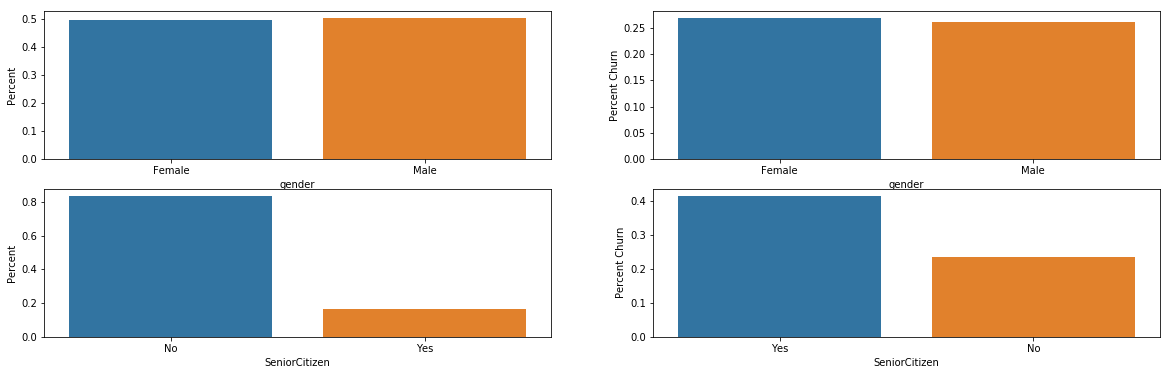

In [16]:
gender_churn_percent_data = data_without_empty[['gender', 'Churn']].groupby(['gender'], as_index=False).mean().sort_values(by='Churn', ascending=False)
seniorcitizen_churn_percent_data = data_without_empty[['SeniorCitizen', 'Churn']].groupby(['SeniorCitizen'], as_index=False).mean().sort_values(by='Churn', ascending=False)

fig = plt.figure(figsize = (20,6))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

a1 = sns.barplot(x="gender", y="MonthlyCharges", data=data_without_empty, estimator=lambda x: len(x) / len(data_without_empty), ax = ax1)
a2 = sns.barplot(x="gender", y="Churn", data=gender_churn_percent_data, ax = ax2)
a3 = sns.barplot(x="SeniorCitizen", y="MonthlyCharges", data=data_without_empty, estimator=lambda x: len(x) / len(data_without_empty), ax = ax3)
a4 = sns.barplot(x="SeniorCitizen", y="Churn", data=seniorcitizen_churn_percent_data, ax = ax4)

a1.set_ylabel('Percent')
a2.set_ylabel('Percent Churn')
a3.set_ylabel('Percent')
a4.set_ylabel('Percent Churn')

plt.show()

#### Observation -
* Gender has no effect on Churn.
* Senior Citizen have high churn rate.

##### Partner and Dependents

C:\Users\AB94613\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


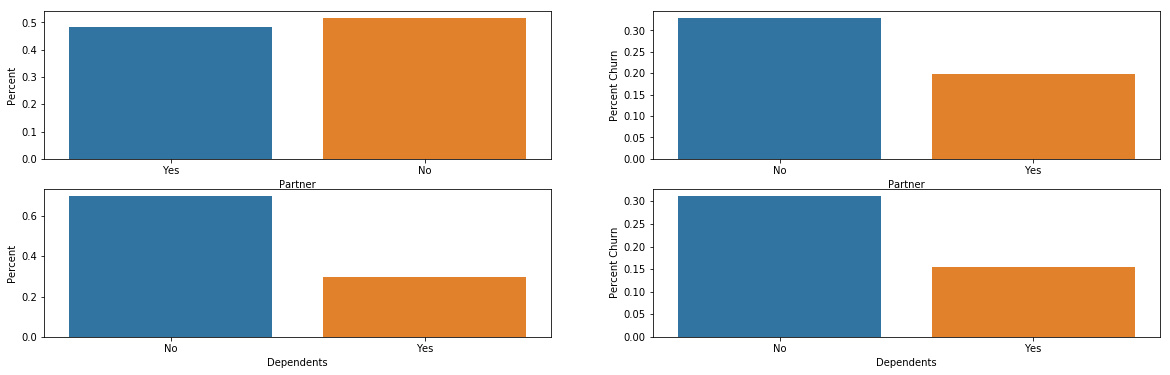

In [17]:
Partner_churn_percent_data = data_without_empty[['Partner', 'Churn']].groupby(['Partner'], as_index=False).mean().sort_values(by='Churn', ascending=False)
Dependents_churn_percent_data = data_without_empty[['Dependents', 'Churn']].groupby(['Dependents'], as_index=False).mean().sort_values(by='Churn', ascending=False)

fig = plt.figure(figsize = (20,6))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

a1 = sns.barplot(x="Partner", y="MonthlyCharges", data=data_without_empty, estimator=lambda x: len(x) / len(data_without_empty), ax = ax1)
a2 = sns.barplot(x="Partner", y="Churn", data=Partner_churn_percent_data, ax = ax2)
a3 = sns.barplot(x="Dependents", y="MonthlyCharges", data=data_without_empty, estimator=lambda x: len(x) / len(data_without_empty), ax = ax3)
a4 = sns.barplot(x="Dependents", y="Churn", data=Dependents_churn_percent_data, ax = ax4)

a1.set_ylabel('Percent')
a2.set_ylabel('Percent Churn')
a3.set_ylabel('Percent')
a4.set_ylabel('Percent Churn')

plt.show()

#### Observation -
People without partners or dependents have high churn rate. 

##### Phone Service and Multiple Lines -

C:\Users\AB94613\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


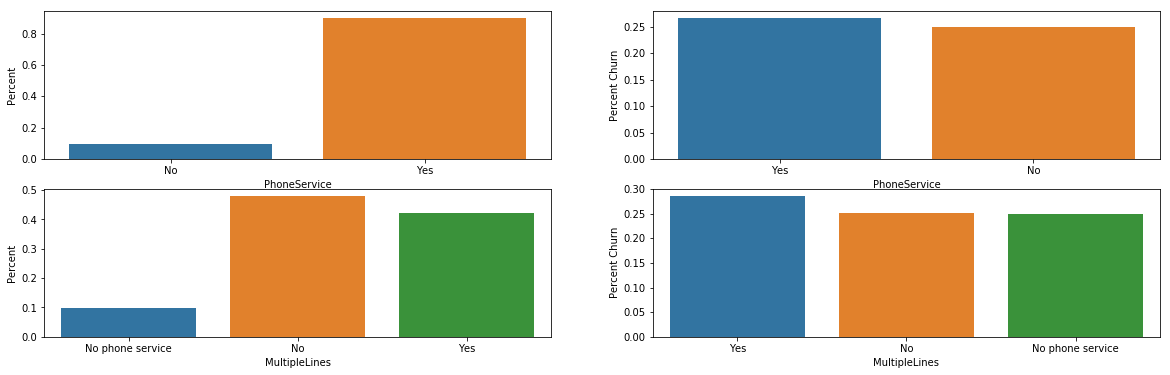

In [18]:
PhoneService_churn_percent_data = data_without_empty[['PhoneService', 'Churn']].groupby(['PhoneService'], as_index=False).mean().sort_values(by='Churn', ascending=False)
MultipleLines_churn_percent_data = data_without_empty[['MultipleLines', 'Churn']].groupby(['MultipleLines'], as_index=False).mean().sort_values(by='Churn', ascending=False)

fig = plt.figure(figsize = (20,6))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

a1 = sns.barplot(x="PhoneService", y="MonthlyCharges", data=data_without_empty, estimator=lambda x: len(x) / len(data_without_empty), ax = ax1)
a2 = sns.barplot(x="PhoneService", y="Churn", data=PhoneService_churn_percent_data, ax = ax2)
a3 = sns.barplot(x="MultipleLines", y="MonthlyCharges", data=data_without_empty, estimator=lambda x: len(x) / len(data_without_empty), ax = ax3)
a4 = sns.barplot(x="MultipleLines", y="Churn", data=MultipleLines_churn_percent_data, ax = ax4)

a1.set_ylabel('Percent')
a2.set_ylabel('Percent Churn')
a3.set_ylabel('Percent')
a4.set_ylabel('Percent Churn')

plt.show()

#### Observation -
* Phone Service doesn't have impact on Churn. 
* People with Multiple Lines have slightly more chances to churn. 

#### Internet Service and Add On Services -

C:\Users\AB94613\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


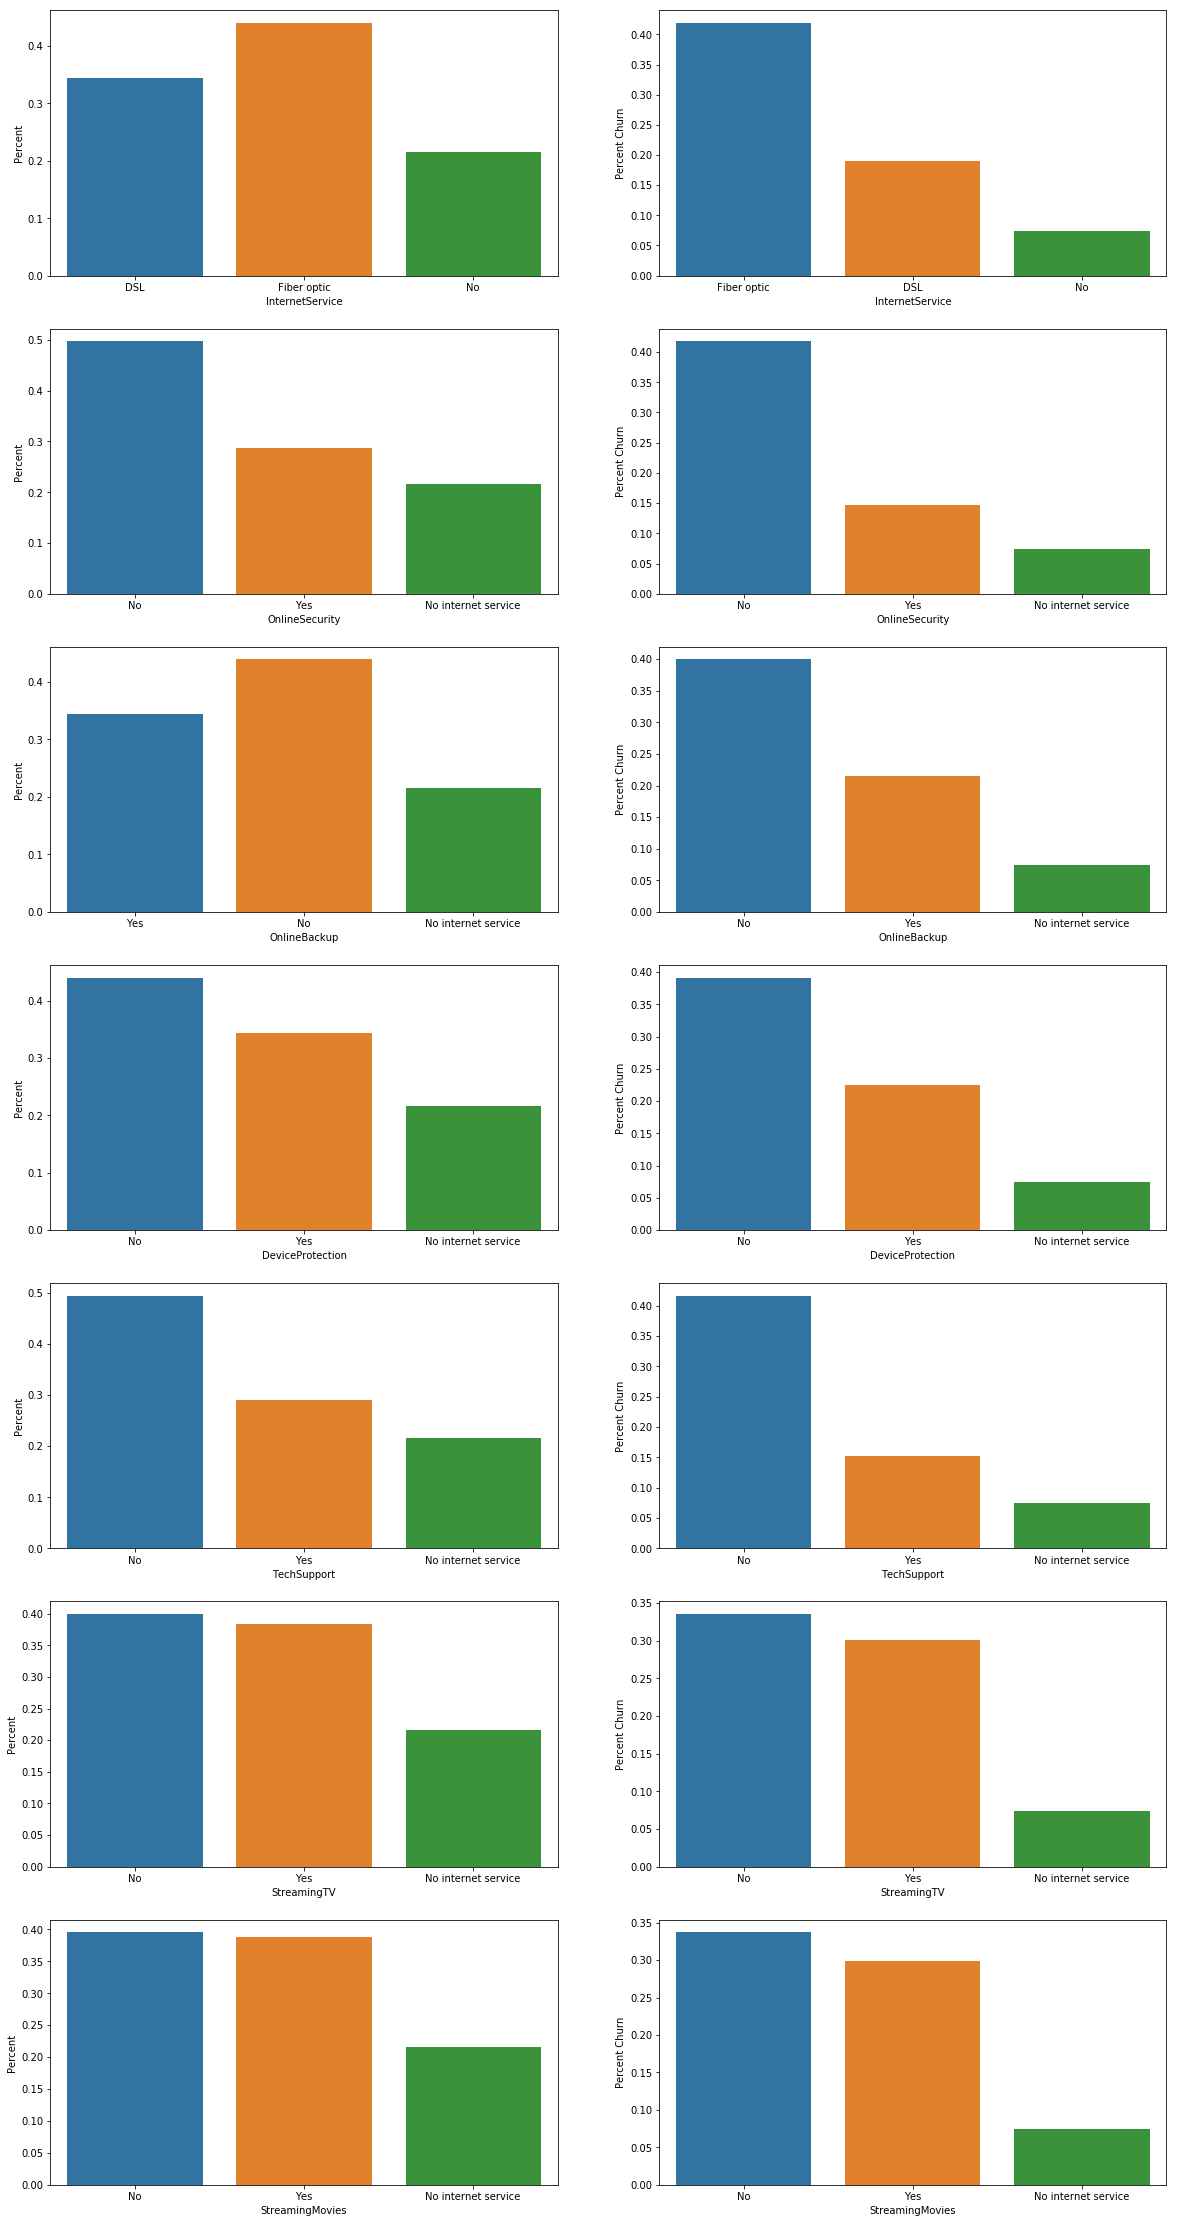

In [19]:
InternetService_churn_percent_data = data_without_empty[['InternetService', 'Churn']].groupby(['InternetService'], as_index=False).mean().sort_values(by='Churn', ascending=False)
OnlineSecurity_churn_percent_data = data_without_empty[['OnlineSecurity', 'Churn']].groupby(['OnlineSecurity'], as_index=False).mean().sort_values(by='Churn', ascending=False)
OnlineBackup_churn_percent_data = data_without_empty[['OnlineBackup', 'Churn']].groupby(['OnlineBackup'], as_index=False).mean().sort_values(by='Churn', ascending=False)
DeviceProtection_churn_percent_data = data_without_empty[['DeviceProtection', 'Churn']].groupby(['DeviceProtection'], as_index=False).mean().sort_values(by='Churn', ascending=False)
TechSupport_churn_percent_data = data_without_empty[['TechSupport', 'Churn']].groupby(['TechSupport'], as_index=False).mean().sort_values(by='Churn', ascending=False)
StreamingTV_churn_percent_data = data_without_empty[['StreamingTV', 'Churn']].groupby(['StreamingTV'], as_index=False).mean().sort_values(by='Churn', ascending=False)
StreamingMovies_churn_percent_data = data_without_empty[['StreamingMovies', 'Churn']].groupby(['StreamingMovies'], as_index=False).mean().sort_values(by='Churn', ascending=False)

fig = plt.figure(figsize = (20,40))

ax1 = fig.add_subplot(7,2,1)
ax2 = fig.add_subplot(7,2,2)
ax3 = fig.add_subplot(7,2,3)
ax4 = fig.add_subplot(7,2,4)
ax5 = fig.add_subplot(7,2,5)
ax6 = fig.add_subplot(7,2,6)
ax7 = fig.add_subplot(7,2,7)
ax8 = fig.add_subplot(7,2,8)
ax9 = fig.add_subplot(7,2,9)
ax10 = fig.add_subplot(7,2,10)
ax11 = fig.add_subplot(7,2,11)
ax12 = fig.add_subplot(7,2,12)
ax13 = fig.add_subplot(7,2,13)
ax14 = fig.add_subplot(7,2,14)

a1 = sns.barplot(x="InternetService", y="MonthlyCharges", data=data_without_empty, estimator=lambda x: len(x) / len(data_without_empty), ax = ax1)
a2 = sns.barplot(x="InternetService", y="Churn", data=InternetService_churn_percent_data, ax = ax2)

a3 = sns.barplot(x="OnlineSecurity", y="MonthlyCharges", data=data_without_empty, estimator=lambda x: len(x) / len(data_without_empty), ax = ax3)
a4 = sns.barplot(x="OnlineSecurity", y="Churn", data=OnlineSecurity_churn_percent_data, ax = ax4)

a5 = sns.barplot(x="OnlineBackup", y="MonthlyCharges", data=data_without_empty, estimator=lambda x: len(x) / len(data_without_empty), ax = ax5)
a6 = sns.barplot(x="OnlineBackup", y="Churn", data=OnlineBackup_churn_percent_data, ax = ax6)

a7 = sns.barplot(x="DeviceProtection", y="MonthlyCharges", data=data_without_empty, estimator=lambda x: len(x) / len(data_without_empty), ax = ax7)
a8 = sns.barplot(x="DeviceProtection", y="Churn", data=DeviceProtection_churn_percent_data, ax = ax8)

a9 = sns.barplot(x="TechSupport", y="MonthlyCharges", data=data_without_empty, estimator=lambda x: len(x) / len(data_without_empty), ax = ax9)
a10 = sns.barplot(x="TechSupport", y="Churn", data=TechSupport_churn_percent_data, ax = ax10)

a11 = sns.barplot(x="StreamingTV", y="MonthlyCharges", data=data_without_empty, estimator=lambda x: len(x) / len(data_without_empty), ax = ax11)
a12 = sns.barplot(x="StreamingTV", y="Churn", data=StreamingTV_churn_percent_data, ax = ax12)
a13 = sns.barplot(x="StreamingMovies", y="MonthlyCharges", data=data_without_empty, estimator=lambda x: len(x) / len(data_without_empty), ax = ax13)
a14 = sns.barplot(x="StreamingMovies", y="Churn", data=StreamingMovies_churn_percent_data, ax = ax14)

a1.set_ylabel('Percent')
a2.set_ylabel('Percent Churn')
a3.set_ylabel('Percent')
a4.set_ylabel('Percent Churn')
a5.set_ylabel('Percent')
a6.set_ylabel('Percent Churn')
a7.set_ylabel('Percent')
a8.set_ylabel('Percent Churn')
a9.set_ylabel('Percent')
a10.set_ylabel('Percent Churn')
a11.set_ylabel('Percent')
a12.set_ylabel('Percent Churn')
a13.set_ylabel('Percent')
a14.set_ylabel('Percent Churn')

plt.show()

#### Observation -
* Fiber Optics Users have High Churn
* Customers without Online Security have high churn.
* Customers without Online BackUp have high churn.
* Customers without Device Protection have high churn.
* Customers without Tech Support have high churn.
* No significant difference between churn pattern of people who Stream TV or Movies and those who doesn't. 

##### Contract, Paperless Billing and Payment Method

C:\Users\AB94613\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


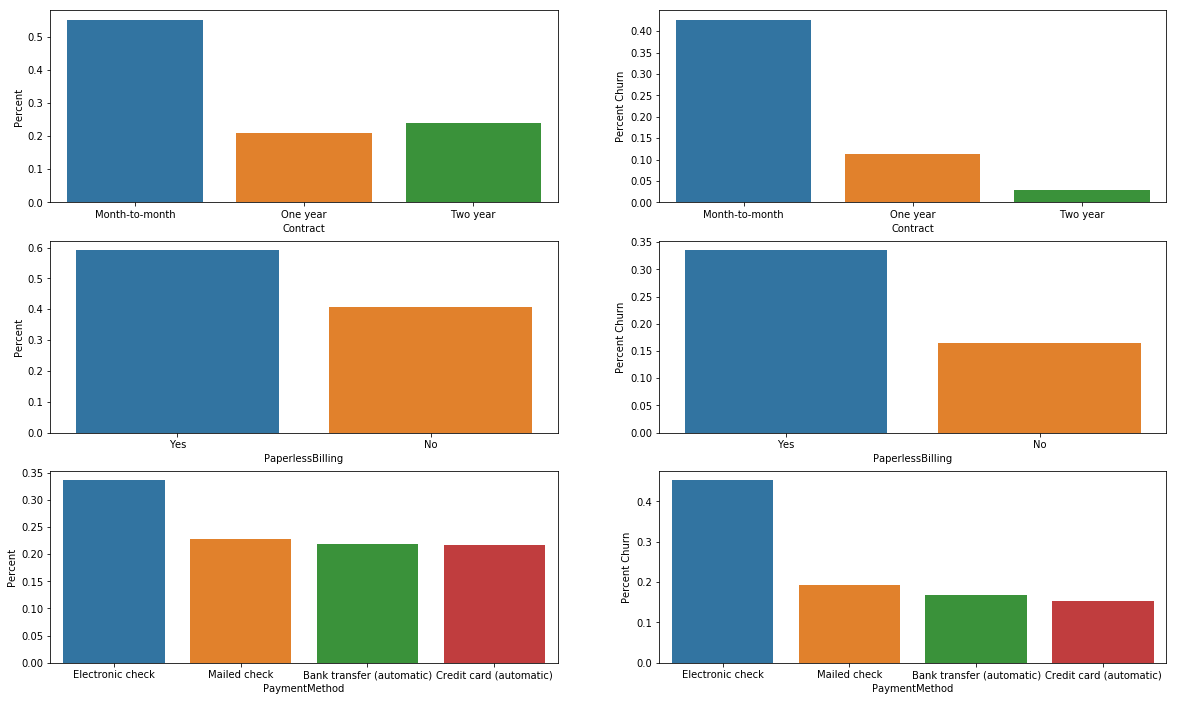

In [20]:
Contract_churn_percent_data = data_without_empty[['Contract', 'Churn']].groupby(['Contract'], as_index=False).mean().sort_values(by='Churn', ascending=False)
PaperlessBilling_churn_percent_data = data_without_empty[['PaperlessBilling', 'Churn']].groupby(['PaperlessBilling'], as_index=False).mean().sort_values(by='Churn', ascending=False)
PaymentMethod_churn_percent_data = data_without_empty[['PaymentMethod', 'Churn']].groupby(['PaymentMethod'], as_index=False).mean().sort_values(by='Churn', ascending=False)

fig = plt.figure(figsize = (20,12))

ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)

a1 = sns.barplot(x="Contract", y="MonthlyCharges", data=data_without_empty, estimator=lambda x: len(x) / len(data_without_empty), ax = ax1)
a2 = sns.barplot(x="Contract", y="Churn", data=Contract_churn_percent_data, ax = ax2)
a3 = sns.barplot(x="PaperlessBilling", y="MonthlyCharges", data=data_without_empty, estimator=lambda x: len(x) / len(data_without_empty), ax = ax3)
a4 = sns.barplot(x="PaperlessBilling", y="Churn", data=PaperlessBilling_churn_percent_data, ax = ax4)
a5 = sns.barplot(x="PaymentMethod", y="MonthlyCharges", data=data_without_empty, estimator=lambda x: len(x) / len(data_without_empty), ax = ax5)
a6 = sns.barplot(x="PaymentMethod", y="Churn", data=PaymentMethod_churn_percent_data, ax = ax6)

a1.set_ylabel('Percent')
a2.set_ylabel('Percent Churn')
a3.set_ylabel('Percent')
a4.set_ylabel('Percent Churn')
a5.set_ylabel('Percent')
a6.set_ylabel('Percent Churn')

plt.show()

#### Observation -
* Monthly Users have High Churn Rate. 
* Those who avail Paperless Billing have High Churn Rate. 
* People who pay by Electronic Check have high churn rate. 

### 6. Data Preprocessing

In [21]:
# Based on EDA, changing 'No Phone Services' to 'No'
# Also, In Payment Method, have just electronic and Others. 

data_without_empty['MultipleLines']= data_without_empty['MultipleLines'].replace({'No phone service':'No'})

def Payment_Method_Transform_fun(payment_method):
    if payment_method == 'Electronic check':
        return 'Electronic check'
    else:
        return 'Others'

data_without_empty['PaymentMethod'] = data_without_empty.apply(lambda x: Payment_Method_Transform_fun(x['PaymentMethod']), axis=1)

In [22]:
## Changing "no service values" to "no" in below columns. 
change_col = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV','StreamingMovies']

for i in change_col:
    data_without_empty[i]= data_without_empty[i].replace({'No internet service':'No'})

#### Converting Categorical Features into Numeric

In [23]:
data_without_empty.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Others,56.95,1889.50,0
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Others,53.85,108.15,1
3,7795-CFOCW,Male,No,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Others,42.30,1840.75,0
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [24]:
# Converting string categorical variables to numeric categorical variables
data_numeric = np.array(data_without_empty)
print(data_numeric)

d_gender = preprocessing.LabelEncoder()
d_gender.fit(['Male', 'Female'])
data_numeric[:,1] =d_gender.transform(data_numeric[:,1])

d_seniority = preprocessing.LabelEncoder()
d_seniority.fit(['Yes', 'No'])
data_numeric[:,2] =d_seniority.transform(data_numeric[:,2])

d_partner = preprocessing.LabelEncoder()
d_partner.fit(['Yes', 'No'])
data_numeric[:,3] =d_partner.transform(data_numeric[:,3])
data_numeric[:,4]= d_partner.transform(data_numeric[:,4])
data_numeric[:,6] = d_partner.transform(data_numeric[:,6])
data_numeric[:,7] = d_partner.transform(data_numeric[:,7])
data_numeric[:,9] = d_partner.transform(data_numeric[:,9])
data_numeric[:,10] = d_partner.transform(data_numeric[:,10])
data_numeric[:,11] = d_partner.transform(data_numeric[:,11])
data_numeric[:,12] = d_partner.transform(data_numeric[:,12])
data_numeric[:,13] = d_partner.transform(data_numeric[:,13])
data_numeric[:,14] = d_partner.transform(data_numeric[:,14])
data_numeric[:,16] = d_partner.transform(data_numeric[:,16])

d_int_service = preprocessing.LabelEncoder()
d_int_service.fit(['DSL','Fiber optic','No'])
data_numeric[:,8] =d_int_service.transform(data_numeric[:,8])

d_pmnt = preprocessing.LabelEncoder()
d_pmnt.fit(['Electronic check','Others'])
data_numeric[:,17] =d_pmnt.transform(data_numeric[:,17])

d_contract = preprocessing.LabelEncoder()
d_contract.fit(['Month-to-month','One year','Two year'])
data_numeric[:,15] =d_contract.transform(data_numeric[:,15])

data_numeric

[['7590-VHVEG' 'Female' 'No' ... 29.85 29.85 0]
 ['5575-GNVDE' 'Male' 'No' ... 56.95 1889.5 0]
 ['3668-QPYBK' 'Male' 'No' ... 53.85 108.15 1]
 ...
 ['4801-JZAZL' 'Female' 'No' ... 29.6 346.45 0]
 ['8361-LTMKD' 'Male' 'Yes' ... 74.4 306.6 1]
 ['3186-AJIEK' 'Male' 'No' ... 105.65 6844.5 0]]


array([['7590-VHVEG', 0, 0, ..., 29.85, 29.85, 0],
       ['5575-GNVDE', 1, 0, ..., 56.95, 1889.5, 0],
       ['3668-QPYBK', 1, 0, ..., 53.85, 108.15, 1],
       ...,
       ['4801-JZAZL', 0, 0, ..., 29.6, 346.45, 0],
       ['8361-LTMKD', 1, 1, ..., 74.4, 306.6, 1],
       ['3186-AJIEK', 1, 0, ..., 105.65, 6844.5, 0]], dtype=object)

In [25]:
# Drop CustomerId column
data_numeric_input  = data_numeric[:,1:19]
data_numeric_output = data_numeric[:,20]
data_numeric_output=data_numeric_output.astype('int')

In [26]:
print(data_numeric_input.shape)
print(data_numeric_output.shape)

(7032, 18)
(7032,)


### Data Standardization

In [27]:
stan_X = StandardScaler().fit_transform(data_numeric_input)

C:\Users\AB94613\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\AB94613\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [28]:
stan_X.shape

(7032, 18)

### Train Test Split

In [29]:
X_1, X_test, Y_1, Y_test = model_selection.train_test_split(stan_X, data_numeric_output, test_size=0.3, random_state=0)

In [30]:
print(X_1.shape)
print(X_test.shape)
print(Y_1.shape)
print(Y_test.shape)

(4922, 18)
(2110, 18)
(4922,)
(2110,)


### 7. Machine Learning Models

In [31]:
# Initialize object
knn = KNeighborsClassifier(n_neighbors=9, weights='distance')
gausian = GaussianNB()
SVM_object = svm.SVC() 
dt_object = tree.DecisionTreeClassifier(criterion="entropy", max_depth = 6)
gb_object = ensemble.GradientBoostingClassifier()
lr_object = linear_model.LogisticRegression()

In [32]:
%%time

object_list = {knn : 'Knn',gausian : 'NB', SVM_object : 'SVM',dt_object : 'DT',gb_object : 'GB',lr_object : 'LR'}

for obj in object_list:
    obj.fit(X_1, Y_1)

    # predict the response on the crossvalidation train
    pred = obj.predict(X_test)

    prefor = precision_score(Y_test, pred)
    recfor = recall_score(Y_test, pred)

    # evaluate CV accuracy
    f1_score_val = f1_score(Y_test, pred) 

    fpr, tpr, thresholds = metrics.roc_curve(Y_test, pred)
    auc = metrics.auc(fpr, tpr)
    
    print('%s\t Precision : %f\t Recall : %f \t F1 Score : %f \t auc : %f ' % (object_list[obj], prefor, recfor, f1_score_val, auc))

Knn	 Precision : 0.543897	 Recall : 0.457658 	 F1 Score : 0.497065 	 auc : 0.660340 
NB	 Precision : 0.538670	 Recall : 0.715315 	 F1 Score : 0.614551 	 auc : 0.748333 
SVM	 Precision : 0.655612	 Recall : 0.463063 	 F1 Score : 0.542767 	 auc : 0.688123 
DT	 Precision : 0.642857	 Recall : 0.454054 	 F1 Score : 0.532207 	 auc : 0.682011 
GB	 Precision : 0.649770	 Recall : 0.508108 	 F1 Score : 0.570273 	 auc : 0.705179 
LR	 Precision : 0.635965	 Recall : 0.522523 	 F1 Score : 0.573689 	 auc : 0.707885 
Wall time: 1.28 s


In [33]:
# Correlation among the predicted value of these models 
pred_knn = pd.Series(knn.predict(X_test), name="knn")
pred_gausian = pd.Series(gausian.predict(X_test), name="gausian")
pred_SVM_object = pd.Series(SVM_object.predict(X_test), name="SVM_object")
pred_dt_object = pd.Series(dt_object.predict(X_test), name="dt_object")
pred_gb_object = pd.Series(gb_object.predict(X_test), name="gb_object")
pred_lr_object = pd.Series(lr_object.predict(X_test), name="lr_object")

concat_pred_values = pd.concat([pred_knn,pred_gausian,pred_SVM_object,pred_dt_object, pred_gb_object, pred_lr_object],axis=1)

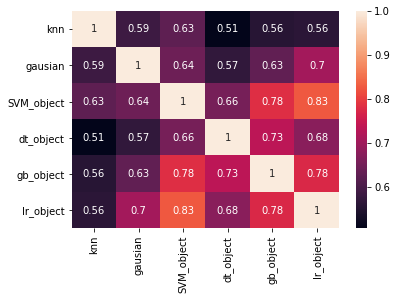

In [34]:
g= sns.heatmap(concat_pred_values.corr(),annot=True)

#### Since these are not highly correlated therefore, looking at ensemble model. 

In [35]:
concat_pred_values.shape

(2110, 6)

In [36]:
concat_pred_values.columns

Index(['knn', 'gausian', 'SVM_object', 'dt_object', 'gb_object', 'lr_object'], dtype='object')

#### Ensemble Model - Majority Voting

In [37]:
# INitializing Majority Vote on 3 models
votingC = VotingClassifier(estimators=[('gausian', gausian),
                                       ('gb_object',gb_object), ('lr_object',lr_object)], 
                           voting='soft', n_jobs=4)

In [38]:
%%time

votingC.fit(X_1, Y_1)

# predict the response on the crossvalidation train
pred = votingC.predict(X_test)

prefor = precision_score(Y_test, pred)
recfor = recall_score(Y_test, pred)

# evaluate CV accuracy
f1_score_val = f1_score(Y_test, pred) 

fpr, tpr, thresholds = metrics.roc_curve(Y_test, pred)
auc = metrics.auc(fpr, tpr)

print('%s\t Precision : %f\t Recall : %f \t F1 Score : %f \t auc : %f ' % (object_list[obj], prefor, recfor, f1_score_val, auc))

LR	 Precision : 0.586555	 Recall : 0.628829 	 F1 Score : 0.606957 	 auc : 0.735315 
Wall time: 8.42 s


C:\Users\AB94613\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


#### Ensemble Model - Miscellaneous (predict churn, If any Model says churn)

In [39]:
def Combined_Pred_fun(knn, gausian, SVM_object, dt_object, gb_object, lr_object):
    if knn == 1 or gausian == 1 or SVM_object == 1 or dt_object == 1 or gb_object == 1 or lr_object == 1:
        return 1
    else:
        return 0

concat_pred_values['Combined_Pred'] = concat_pred_values.apply(lambda x: Combined_Pred_fun(x['knn'], x['gausian'], x['SVM_object'], x['dt_object'], x['gb_object'], x['lr_object']), axis=1)

prefor = precision_score(Y_test, concat_pred_values['Combined_Pred'])
recfor = recall_score(Y_test, concat_pred_values['Combined_Pred'])

# evaluate CV accuracy
f1_score_val = f1_score(Y_test, concat_pred_values['Combined_Pred']) 

fpr, tpr, thresholds = metrics.roc_curve(Y_test, concat_pred_values['Combined_Pred'])
auc = metrics.auc(fpr, tpr)

print('Ensemble\t Precision : %f\t Recall : %f \t F1 Score : %f \t auc : %f ' % (prefor, recfor, f1_score_val, auc))

Ensemble	 Precision : 0.513806	 Recall : 0.771171 	 F1 Score : 0.616715 	 auc : 0.755361 


# 8. Conclusion -
____

#### If F1 Score is the evaluation measure - 
    - Naive Bayes yields the best results.
    - Result Interpretation - Among 100 users, if 10 churn than our model gives a list of 14 customers among which 7 churn. 

#### If Recall is the evaluation measure -
    - Ensemble - Miscellaneous yields the best results.
    - Result Interpretation - Among 100 users, if 10 churn than our model gives a list of 16 customers among which 8 churn.